In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# SCRAPING THE WEBSITE FOR REVIEWS

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Win...
1,✅ Trip Verified | 4 Hours before takeoff we r...
2,✅ Trip Verified | I recently had a delay on B...
3,"Not Verified | Boarded on time, but it took a..."
4,"✅ Trip Verified | 5 days before the flight, w..."


# CLEANING STRUCTURE OF DATA

In [4]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [5]:
df

,reviews
0,Quick bag drop at First Wing but too many pa...
1,4 Hours before takeoff we received a Mail st...
2,I recently had a delay on British Airways fr...
3,"Boarded on time, but it took ages to get to ..."
4,"5 days before the flight, we were advised by..."
...,...
995,I used avios point to upgrade from economy to...
996,"Boarding was fairly quick, the well turned ou..."
997,Bangalore to London. Ground experience not g...
998,Barcelona to New York via London. I was in B...


In [6]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...


In [7]:
df["reviews"].nunique()

1000

# IMPORTING REQUIRED LIBRARIES

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

## CLEANING DATA USING NLP TECHNIQUES
### 1. POS TAGGING

In [9]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ..."
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai..."
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air..."
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)..."
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)..."


### 2. LEMMATIZATION

In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Quick bag drop at First Wing but too many pa...,Quick bag drop First Wing many passenger use...
1,4 Hours before takeoff we received a Mail st...,Hours takeoff receive Mail state cryptic mes...
2,I recently had a delay on British Airways fr...,recently delay British Airways BRU LHR due s...
3,"Boarded on time, but it took ages to get to ...",Boarded time take age get runway due congest...
4,"5 days before the flight, we were advised by...",day flight advise BA cancel ask us rebook fl...
...,...,...
995,I used avios point to upgrade from economy to...,use avios point upgrade economy premium econ...
996,"Boarding was fairly quick, the well turned ou...",Boarding fairly quick well turn staff quickl...
997,Bangalore to London. Ground experience not g...,Bangalore London Ground experience great LHR...
998,Barcelona to New York via London. I was in B...,Barcelona New York via London Barcelona four...


## GETTING SENTIMENT OF THE CLEANED REVIEWS

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...,0.9806,Positive
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...,-0.8046,Negative
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...,-0.7165,Negative
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404,Neutral
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...,-0.3167,Negative


## OUTPUT VISUALISATION

In [13]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    480
Negative    412
Neutral     108
Name: count, dtype: int64

### 1. PIE - CHART

([<matplotlib.patches.Wedge at 0x28c52457520>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

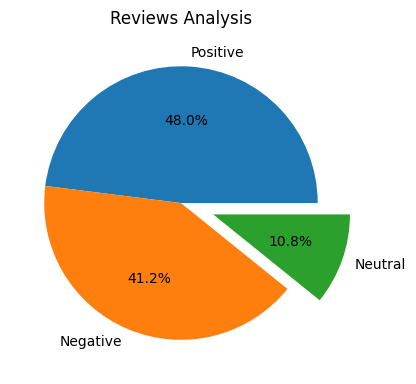

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,explode = (0,0,0.25), autopct='%1.1f%%')

### 2. WORDCLOUD

In [15]:
df.to_csv("BA_reviews.csv")

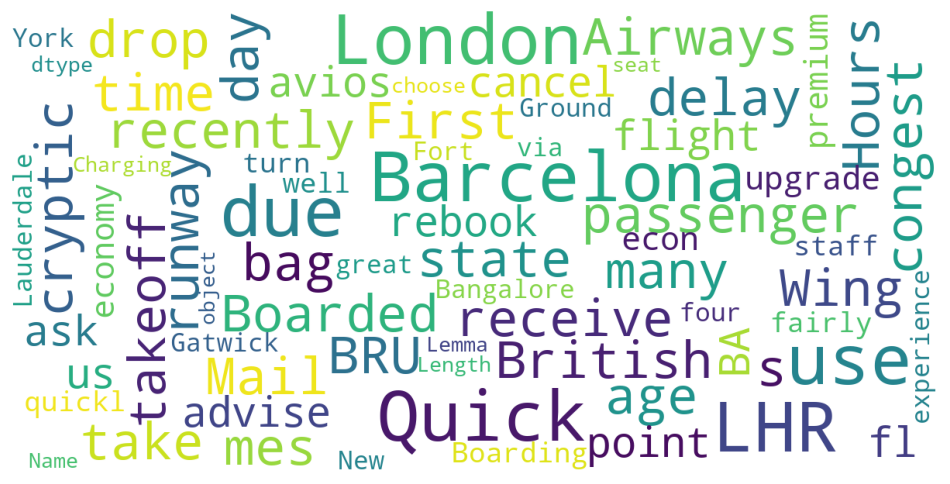

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df.Lemma)

Top 10 Negative Words:
flight: 927
ba: 509
seat: 341
hour: 304
service: 287
get: 283
london: 239
time: 219
fly: 205
us: 195


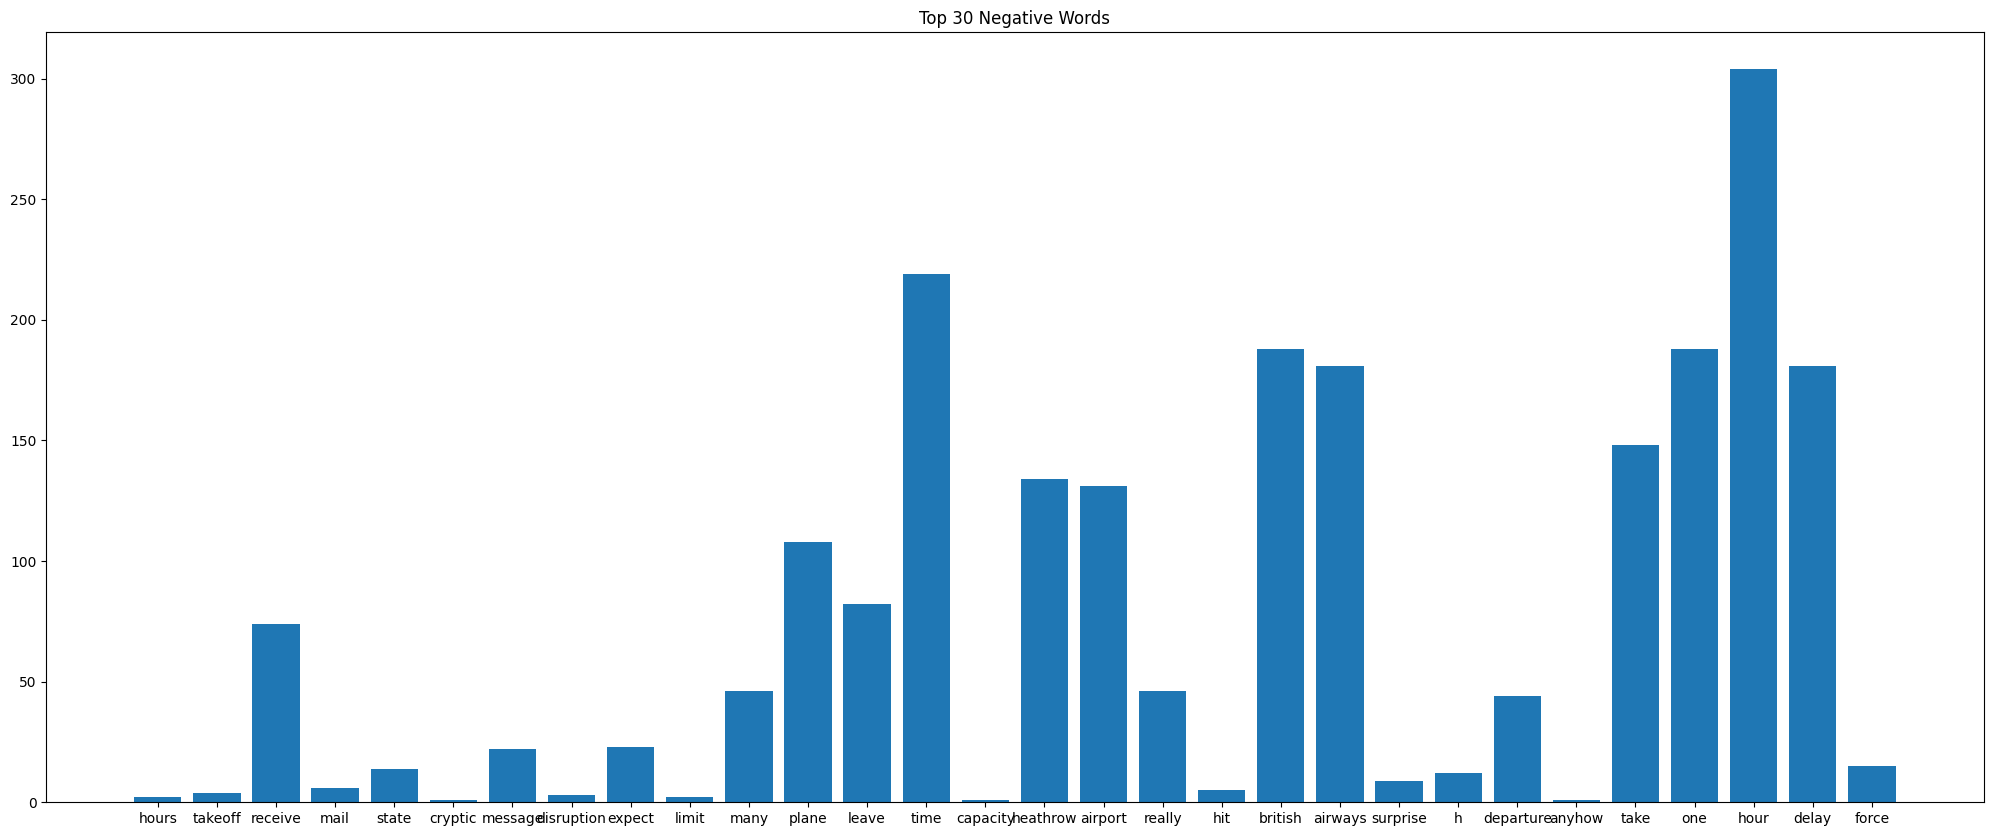

<Figure size 640x480 with 0 Axes>

In [17]:
# Filter the DataFrame to include only 'Negative' sentiment reviews
negative_reviews_df = df[df['Analysis'] == 'Negative']

# Tokenize and process the words in negative reviews
negative_words = []
for index, row in negative_reviews_df.iterrows():
    tokens = word_tokenize(row['Lemma'])
    for token in tokens:
        negative_words.append(token.lower())  # Convert to lowercase for consistency

# Analyze the frequency of each word
negative_word_freq = nltk.FreqDist(negative_words)

# Display the top 10 negative words
top_negative_words = negative_word_freq.most_common(10)
print("Top 10 Negative Words:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

# You can also visualize the word frequencies using a bar plot
plt.figure(figsize=(25, 10))

# Extract the top 30 negative words and their frequencies
top_30_words = list(negative_word_freq.keys())[:30]
top_30_frequencies = list(negative_word_freq.values())[:30]

# Create a bar plot using the top 30 words and their frequencies
plt.bar(top_30_words, top_30_frequencies)

# Set the title of the plot
plt.title('Top 30 Negative Words')

# Set the figure title
plt.figure('Top 30 Negative Words')

# Show the plot
plt.show()

In [18]:
cleaned_reviews = df['Cleaned Reviews']

In [19]:
df['Lemma'].head()

0      Quick bag drop First Wing many passenger use...
1      Hours takeoff receive Mail state cryptic mes...
2      recently delay British Airways BRU LHR due s...
3      Boarded time take age get runway due congest...
4      day flight advise BA cancel ask us rebook fl...
Name: Lemma, dtype: object

In [20]:
import nltk
#nltk.download('vaderSentiment')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define the negative words list
#negative_words = ['bad', 'poor', 'terrible', 'awful', 'horrible', 'disappointed', 'unsatisfied', 'unhappy', 'frustrated', 'angry', 'disgusted']

# Create a function to identify negative words in a review
def identify_negative_words(review):
    negative_words_found = []
    for word in review.lower().split():
        if word in negative_words:
            negative_words_found.append(word)
    return negative_words_found

# Analyze the sentiment of each review and identify negative words
analyzer = SentimentIntensityAnalyzer()
for review in cleaned_reviews:
    sentiment = analyzer.polarity_scores(review)
    if sentiment['compound'] < 0:
        negative_words_found = identify_negative_words(review)
        print(f"Review: {review}")
        print(f"Negative words found: {negative_words_found}")


Review:  Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing 
Negative words found: ['hours', 'takeoff', 'received', 'mail', 'stating', 'cryptic', 'message', 'limit', 'many', 'leave', 'time', 'capacity', 'heathrow', 'airport', 'really', 'hit', 'british', 'airways', 'surprise', 'h', 'departure', 'anyhow', 'took', 'one', 'hour', 'delay', 'check', 'hand', 'luggage', 'travel', 'hand', 'l

Review: ✅ Trip Verified |  We had a flight to Santorini from LHR at 8:10am. As the flight was full, we had to check in all our luggage. We arrived at the airport at 7:00am, and the queue for check-in was incredibly long because some desks were closed. It took us over 40 minutes to arrive to a desk, and when we arrived we were told that the check-in had closed (at 7:25am) and that we had missed the flight. British Airways staff did not offer us to jump the queue at anytime. The lady at the desk booked us on a flight to Athens instead, telling us that the costs to reach Santorini would be reimbursed. We had to book two tickets worth £200 for a flight to Santorini on the same day. We have just received a response from the Customer Relations service telling us that we would get nothing. 
Negative words found: []
Review: ✅ Trip Verified |  My flight from Los Angeles to Paris via London was delayed due to late inbound aircraft due to mechanical and so I missed my connexion in London and arri

Review: ✅ Trip Verified |  London to Bangkok. It's not what it used to be but most importantly, it does not deliver what it promises any longer.  Disappointing food, outdated and uncomfortable seats, appalling baggage handling at LHR, and  mediocre crew service onboard. The customer service online is just as bad. My most recent experience was early January 2020 when they put me next to a couple with a newborn baby in Club World on an overnight flight from LHR to BKK. Baby screams, could not sleep and as the cabin was full, they could not move me. The couple was very nice, apologetic and we just had to bear the 12 hours long haul flight together. However, my dealings with customer service was appalling. When is BA going to offer a kids free zone in Club World for people who need to work or sleep?
Negative words found: []
Review: ✅ Trip Verified |  Los Angeles to London on 6th January, and my husbands seat was broken. The Customer Service Manager was rude to me and made insinuations abou

Review: ✅ Trip Verified |  Brussels to London. We were not given a seat number upon check in and were left waiting outside the gate for the boarding passes to be re printed without any explanation. Everyone else with a boarding pass was boarding whilst about 50% were just looking at the operators thinking what is going on. Extremely poor communication from the airline to and from the airport operators. 
Negative words found: ['poor']
Review: ✅ Trip Verified |  My flight from London to Singapore in premium economy was the worst I have experienced. The seat was uncomfortable, the flight tracker failed after two hours, the breakfast prior to arrival in Singapore (scrambled egg) was like rubber. They ran out of cups and so my wife and I had no coffee, tea or drink with our breakfast. I used the call button to get some attention and no one came to answer my call even after waiting more than 30 minutes. Eventually I made contact with a passing cabin crew member and advised that we had not ha

Review: ✅ Trip Verified | My flight was cancelled 3 days in a row. Was flying out on Thursday and finally after days and hours of arguing with BA, I got a flight out Saturday night with Swiss Air. They on the other hand actually fly and on time. Everything about the customer service, customer relations has been terrible, hours of waiting on the phone, no answers on email. My other flights with BA this year has been delayed too. They have for two months promised to reimburse me on all my expenses and to pay the penalty fine of 700$. First 10 days, then 21 bank days and now we are way passed anything else that they have not transferred the money yet. So far nothing and the complaint has been turned over to CAA and the Danish Aviation Authority.
Negative words found: []
Review: ✅ Trip Verified |  Hong Kong to Copenhagen via London. The whole experience is a nightmare to me and my wife. My wife lost her luggage ever since the first day of our journey on 1st August because our two pieces of

Review: ✅ Trip Verified | London to Seoul. Nightmare experience with British Airways almost constantly. My Business cabin is downgraded to economy at the last minute with a 12 hours long-hauls flight! Lounge simy sucks, cheap, noisy and croweed. Multiple malfunction items on the aircraft including unfolded table. Given the price it Charge, certainly one of the worst airlines one can possible take.
Negative words found: []
Review: ✅ Trip Verified |  Miami to Delhi via London.  The BA business class I flew for the first time recently was the worst I have  flown. Whereas most have four seats across British Airways has eight! The lay down beds are hard, thin and short. Not worth the money.
Negative words found: []
Review: Not Verified |  London to Sydney via Singapore. Checked in with a bag which was 23.4kg. My allowance was 23kg. I was made to repackage the bag and take two pairs of shoes out and place them in my hand luggage, really? I found the food on both legs of the flight horrible.


Review: ✅ Trip Verified |  London to Boston. BA replaced A380 with a very old Boeing 747. Video system did not work for more than 1 hour, then work for a few hours and stopped working. No WIFI, very old plane. Service OK. Not good for business traveling.
Negative words found: []
Review: ✅ Trip Verified |  London to Bangalore. This was the worst experience. I flew with my infant daughter ande cabin crew was extremely rude. I was surprised that there was no way to heat milk for my daughter. I found the food portions so meagre. Not sufficient for a child also.  British Airways is sad in every sense of the term.
Negative words found: []
Review: ✅ Trip Verified |  Hamburg to Abu Dhabi via Heathrow. The 1.5h flight from Hamburg to Heathrow was like flying a budget carrier. No free service at all, everything has to be purchased at inflated prices. Heathrow T5 the usual chaos. I can use the F Lounge due to my One World status. Massive lounge, crowded with the charm and food quality of a Cafete

Review: ✅ Trip Verified | Flown with British Airways on numerous occasions with no issues. However on this occasion my baggage was lost on arrival at Gatwick. There was no British airways representative at the baggage claim however there was a phone that allowed me to call the baggage department. Reclaiming lost baggage was simple and my bag was put on the next flight to Singapore which I received the following day.
Negative words found: []
Review: ✅ Trip Verified | Flying last Sunday from Geneva to Piladelphia via London in business class. When I arrived at the boarding gate in London to take my flight to Philadelphia they told me that there was no sufficient business seat available! They overbooked! My choice was then either to fly ecenomy or to take the next flight! They just did not care about their customer. No phone call, no email, no indication at the lounge nothing until I was at the boarding gate. I kindly accepted to take the next flight. The plane was delayed by 1 hour due t

In [21]:
from collections import Counter

# Define a function to extract negative words from a review
def extract_negative_words(review):
    # Tokenize the review into individual words
    tokens = nltk.word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Perform sentence-level sentiment analysis
    sid = nltk.SentenceID(tokens)
    sentence = nltk.Sentence(sid, tokens)
    si = SentimentIntensityAnalyzer()
    sentiment = si.polarity_scores(sentence)
    
    # Extract negative words based on sentiment intensity
    negative_words = []
    for token in tokens:
        if sentiment[token] < 0:
            negative_words.append(token)
    
    return negative_words

# Define a function to analyze reviews and extract the top negative words
def analyze_reviews(reviews):
    negative_words = []
    for review in cleaned_reviews:
        negative_words.extend(extract_negative_words(review))
    
    # Count the occurrences of each negative word
    negative_word_counts = Counter(negative_words)
    
    # Get the top 10 negative words based on frequency
    top_negative_words = negative_word_counts.most_common(10)
    
    return top_negative_words


print(top_negative_words)

[('flight', 927), ('ba', 509), ('seat', 341), ('hour', 304), ('service', 287), ('get', 283), ('london', 239), ('time', 219), ('fly', 205), ('us', 195)]


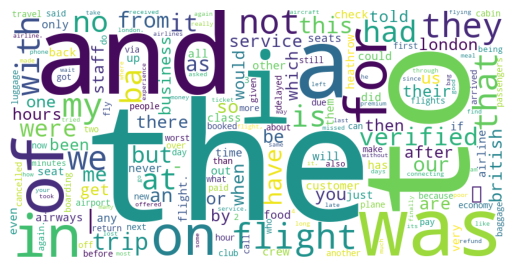

Area to improve: ✅
Number of mentions: 394
Area to improve: trip
Number of mentions: 451
Area to improve: verified
Number of mentions: 508
Area to improve: |
Number of mentions: 504
Area to improve: 4
Number of mentions: 54
Area to improve: hours
Number of mentions: 185
Area to improve: before
Number of mentions: 114
Area to improve: takeoff
Number of mentions: 5
Area to improve: we
Number of mentions: 693
Area to improve: received
Number of mentions: 62
Area to improve: a
Number of mentions: 1611
Area to improve: mail
Number of mentions: 2
Area to improve: stating
Number of mentions: 5
Area to improve: cryptic
Number of mentions: 1
Area to improve: message
Number of mentions: 17
Area to improve: that
Number of mentions: 676
Area to improve: there
Number of mentions: 251
Area to improve: are
Number of mentions: 262
Area to improve: disruptions
Number of mentions: 1
Area to improve: to
Number of mentions: 2944
Area to improve: be
Number of mentions: 274
Area to improve: expected
Number 

In [22]:
# Cleaning the reviews
def clean_review(review):
    review = review.lower()
    review = review.replace('<br/>', '')
    review = review.replace('"', '')
    review = review.replace("'", '')
    return review
cleaned_reviews = [clean_review(review) for review in reviews]

# Identifying the negative words

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
negative_words = []
for review in cleaned_reviews:
    sentiment = analyzer.polarity_scores(review)
    if sentiment['compound'] < 0:
        negative_words.extend(review.split())

# Counting the frequency of negative words
from collections import Counter
negative_word_counts = Counter(negative_words)

# Creating a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400)
wordcloud.generate_from_frequencies(negative_word_counts)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Identifying the areas where the company needs to improve
from collections import defaultdict
areas_to_improve = defaultdict(int)
for review in cleaned_reviews:
    sentiment = analyzer.polarity_scores(review)
    if sentiment['compound'] < 0:
        for word in review.split():
            if word in negative_word_counts:
                areas_to_improve[word] += 1

# Printing the areas where the company needs to improve
for area, count in areas_to_improve.items():
    print(f"Area to improve: {area}")
    print(f"Number of mentions: {count}")

In [23]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from collections import Counter, defaultdict

#nltk.download('stopwords')
#nltk.download('wordnet')

def clean_review(review):
    review = review.lower()
    review = review.replace('<br/>', '')
    review = review.replace('"', '')
    review = review.replace("'", '')
    return review

def extract_negative_words(review):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    tokens = nltk.word_tokenize(review)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    si = SentimentIntensityAnalyzer()
    sentiment = si.polarity_scores(review)
    
    negative_words = [token for token in tokens if sentiment['compound'] < 0]
    
    return negative_words

def analyze_reviews(reviews):
    negative_words = []
    for review in reviews:
        negative_words.extend(extract_negative_words(review))
    
    negative_word_counts = Counter(negative_words)
    
    top_negative_words = negative_word_counts.most_common(10)
    
    return top_negative_words

def areas_to_improve(reviews):
    areas = defaultdict(int)
    for review in reviews:
        negative_words = extract_negative_words(review)
        for word in negative_words:
            areas[word] += 1
    
    return areas


cleaned_reviews = [clean_review(review) for review in reviews]
top_negative_words = analyze_reviews(cleaned_reviews)
areas = areas_to_improve(cleaned_reviews)

print("Top 10 negative words:")
for word, count in top_negative_words:
    print(f"Word: {word}, Frequency: {count}")

print("\nAreas to improve:")
for area, count in areas.items():
    print(f"Area: {area}, Number of mentions: {count}")


AttributeError: 'set' object has no attribute 'words'

In [ ]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from collections import Counter, defaultdict

#nltk.download('stopwords')
#nltk.download('wordnet')

def clean_review(cleaned_reviews):
    review = cleaned_reviews.lower()
    review = cleaned_reviews.replace('<br/>', '')
    review = cleaned_reviews.replace('"', '')
    review = cleaned_reviews.replace("'", '')
    return review

def extract_negative_words(review):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    tokens = nltk.word_tokenize(review)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    si = SentimentIntensityAnalyzer()
    sentiment = si.polarity_scores(review)
    
    negative_words = [token for token in tokens if sentiment['compound'] < 0]
    
    return negative_words

def analyze_reviews(reviews):
    negative_words = []
    for review in cleaned_reviews:
        negative_words.extend(extract_negative_words(review))
    
    negative_word_counts = Counter(negative_words)
    
    top_negative_words = negative_word_counts.most_common(10)
    
    return top_negative_words

def areas_to_improve(reviews):
    areas = defaultdict(int)
    for review in cleaned_reviews:
        negative_words = extract_negative_words(review)
        for word in negative_words:
            areas[word] += 1
    
    return areas

cleaned_reviews = [clean_review(review) for review in reviews]
top_negative_words = analyze_reviews(cleaned_reviews)
areas = areas_to_improve(cleaned_reviews)

print("Top 10 negative words:")
for word, count in top_negative_words:
    print(f"Word: {word}, Frequency: {count}")

print("\nAreas to improve:")
for area, count in areas.items():
    print(f"Area: {area}, Number of mentions: {count}")
